In [1]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O vgsales.csv

--2025-10-15 10:08:35--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.226.242.108, 13.226.242.56, 13.226.242.213, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.226.242.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘vgsales.csv’

vgsales.csv         100%[===================>]   1.95M  --.-KB/s    in 0.07s   

2025-10-15 10:08:35 (27.0 MB/s) - ‘vgsales.csv’ saved [2041483/2041483]



In [2]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.utils import shuffle
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, roc_auc_score,log_loss, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('vgsales.csv')
data.head()
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16652.000000,16381.000000,16652.000000,16652.000000,16652.000000,16652.000000,16652.000000
mean,8283.409620,2006.390513,2.752314,1.996875,2.499677,1.151829,8.457873
std,4794.471477,5.863261,1.327002,1.322972,1.164023,1.054813,3.717756
min,1.000000,1980.000000,0.140000,0.010000,0.000000,-0.474276,0.240000
25%,4129.750000,2003.000000,1.781124,1.087977,1.781124,0.394830,5.580341
50%,8273.500000,2007.000000,2.697415,1.714664,2.480356,0.491870,7.536614
75%,12436.250000,2010.000000,3.677290,2.795123,3.176299,1.781124,11.227334
max,16600.000000,2020.000000,8.725452,8.367985,12.722984,7.358020,30.555862


In [5]:
game_life = data.groupby('Name').agg(min_year=('Year','min'), max_year=('Year','max'))
game_life['range'] = game_life['max_year'] - game_life['min_year']
game_life.sort_values(['range'], ascending=False)[:5]

,min_year,max_year,range
Name,,,
Ice Hockey,1980.0,2020.0,40.0
Baseball,1980.0,2019.0,39.0
Battlezone,1982.0,2006.0,24.0
Romance of the Three Kingdoms II,1991.0,2015.0,24.0
Bomberman,1985.0,2008.0,23.0


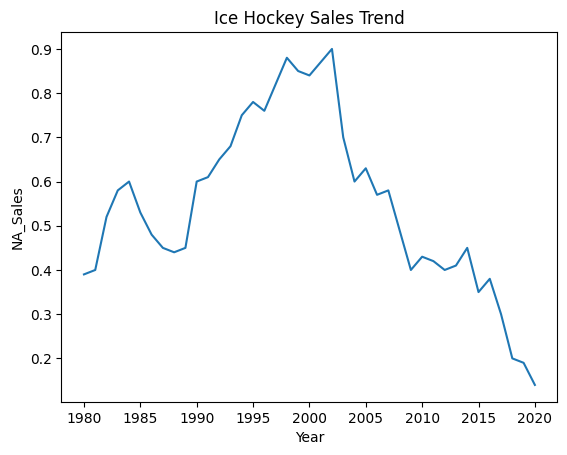

In [6]:
ih = data.loc[data['Name']=='Ice Hockey']
sns.lineplot(x='Year', y='NA_Sales', data=ih)
plt.title('Ice Hockey Sales Trend')
plt.show()

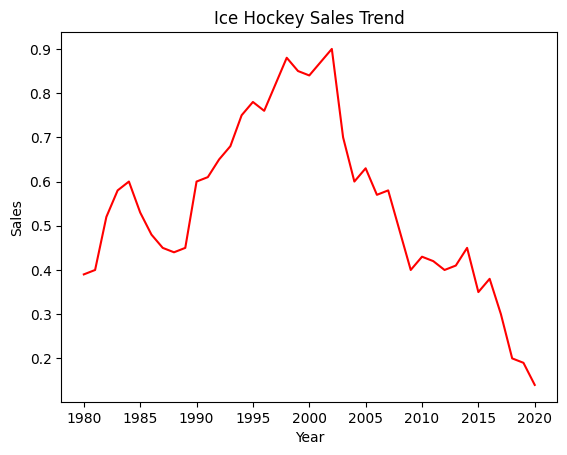

In [7]:
plt.title('Ice Hockey Sales Trend')
plt.xlabel('Year')
plt.ylabel('Sales')
sns.lineplot(x='Year', y='NA_Sales', data=ih, color='r')
plt.show()


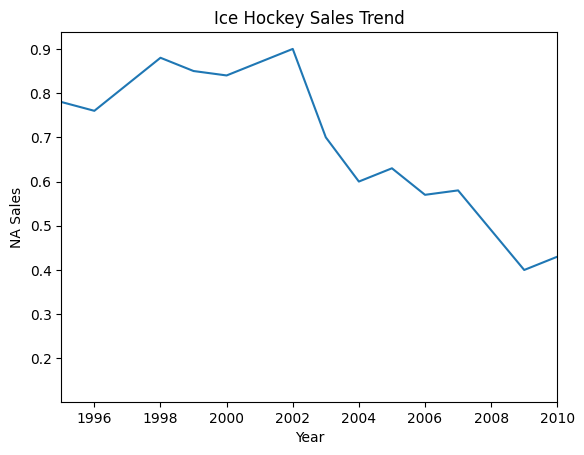

In [8]:
plt.title('Ice Hockey Sales Trend')
plt.xlabel('Year')
plt.ylabel('NA Sales')
plt.xlim(left=1995,right=2010)
sns.lineplot(x='Year', y='NA_Sales', data=ih)
plt.show()


<Axes: xlabel='Year', ylabel='NA_Sales'>

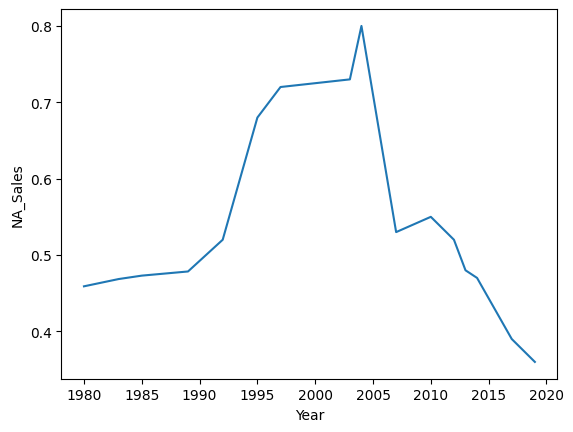

In [9]:
baseball = data.loc[data['Name']=='Baseball']
sns.lineplot(x='Year', y='NA_Sales', data=baseball)


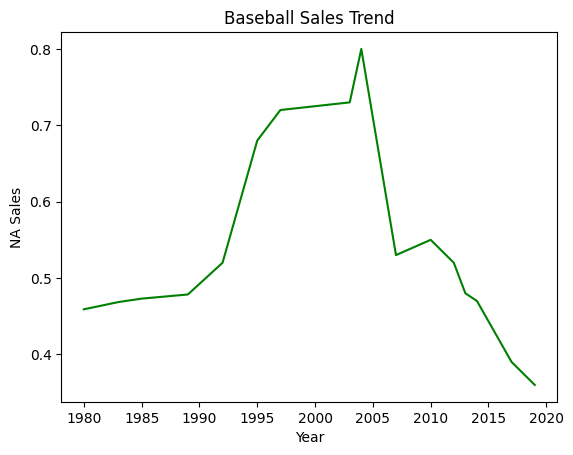

In [10]:
plt.title('Baseball Sales Trend')
plt.xlabel('Year')
plt.ylabel('NA Sales')
sns.lineplot(x='Year', y='NA_Sales', data=baseball, color='g')
plt.show()


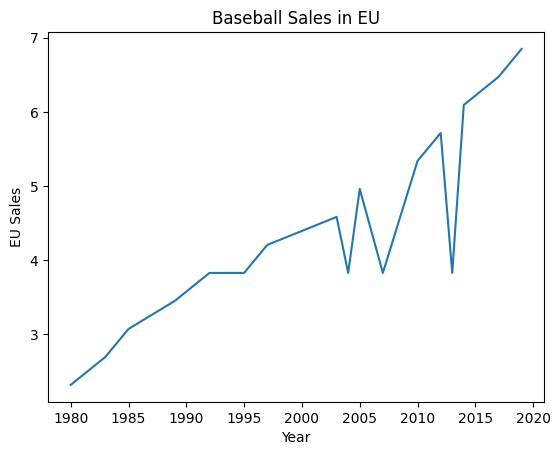

In [11]:
sns.lineplot(x='Year', y='EU_Sales', data=baseball)
plt.title('Baseball Sales in EU')
plt.xlabel('Year')
plt.ylabel('EU Sales')
plt.show()


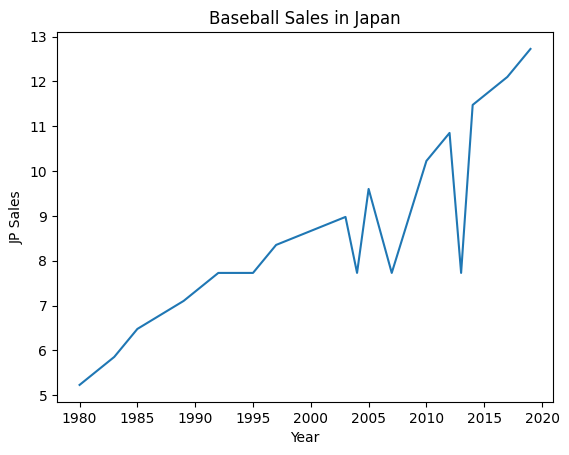

In [12]:
sns.lineplot(x='Year', y='JP_Sales', data=baseball)
plt.title('Baseball Sales in Japan')
plt.xlabel('Year')
plt.ylabel('JP Sales')
plt.show()


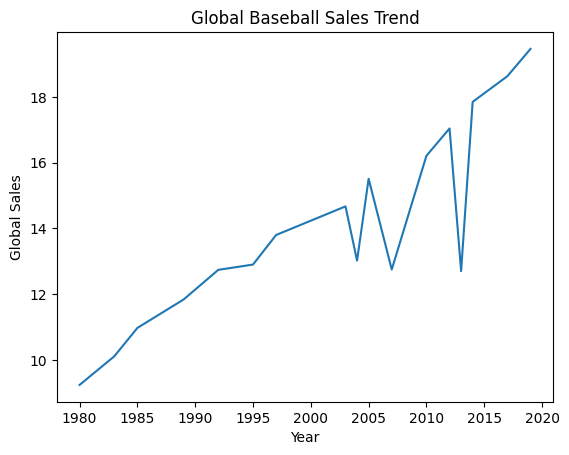

In [13]:
sns.lineplot(x='Year', y='Global_Sales', data=baseball)
plt.title('Global Baseball Sales Trend')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()


In [14]:
data['Genre'].value_counts().head(10)


,count
Genre,
Action,3316
Sports,2400
Misc,1739
Role-Playing,1488
Shooter,1310
Adventure,1286
Racing,1249
Platform,886
Simulation,867


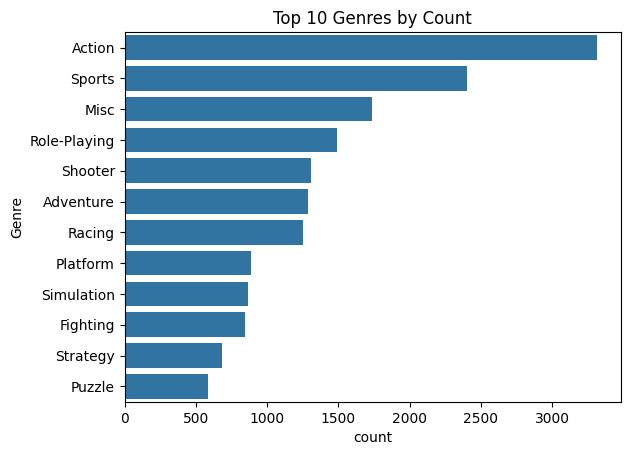

In [15]:
sns.countplot(y='Genre', data=data, order=data['Genre'].value_counts().index)
plt.title('Top 10 Genres by Count')
plt.show()


In [16]:
top_publishers = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_publishers

,Global_Sales
Publisher,
Electronic Arts,14261.339604
Activision,9566.816314
Nintendo,9034.931204
Ubisoft,8331.007762
Sony Computer Entertainment,7142.847859
THQ,6797.681437
Namco Bandai Games,6674.475762
Konami Digital Entertainment,6447.567589
Sega,5331.431162


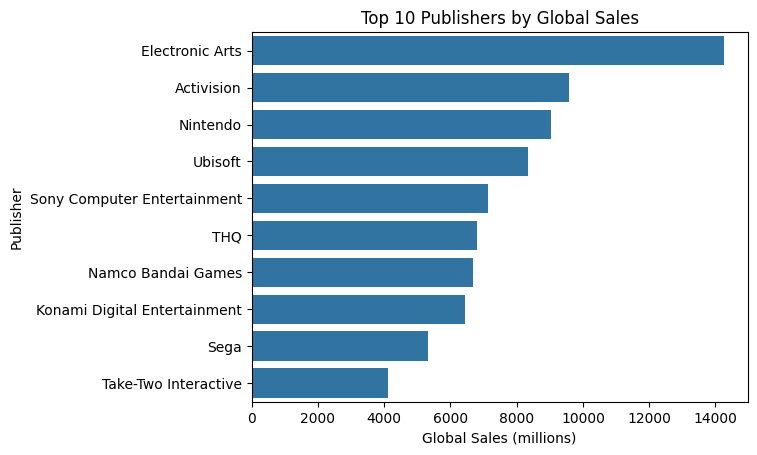

In [17]:
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.title('Top 10 Publishers by Global Sales')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Publisher')
plt.show()


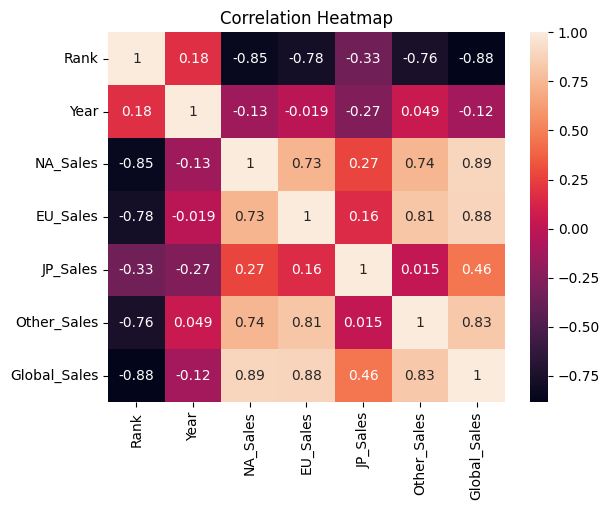

In [19]:
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

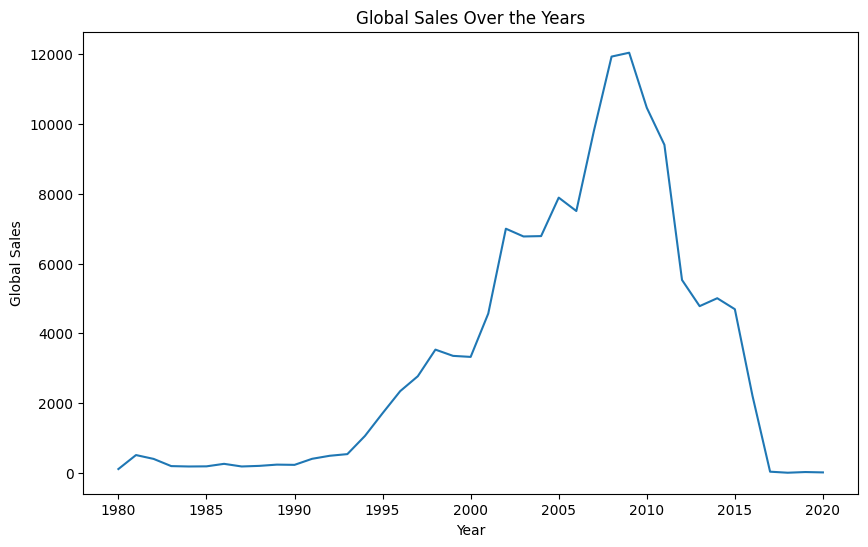

In [20]:
data.groupby('Year')['Global_Sales'].sum().plot(kind='line', figsize=(10,6))
plt.title('Global Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()


In [21]:
top_games = data.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_games


,Global_Sales
Name,
Baseball,239.420857
Need for Speed: Most Wanted,140.736534
FIFA 14,121.427943
FIFA 15,114.713514
LEGO Marvel Super Heroes,108.375309
FIFA Soccer 13,103.720277
Grand Theft Auto V,101.183010
Minecraft,98.775452
Monopoly,96.004196


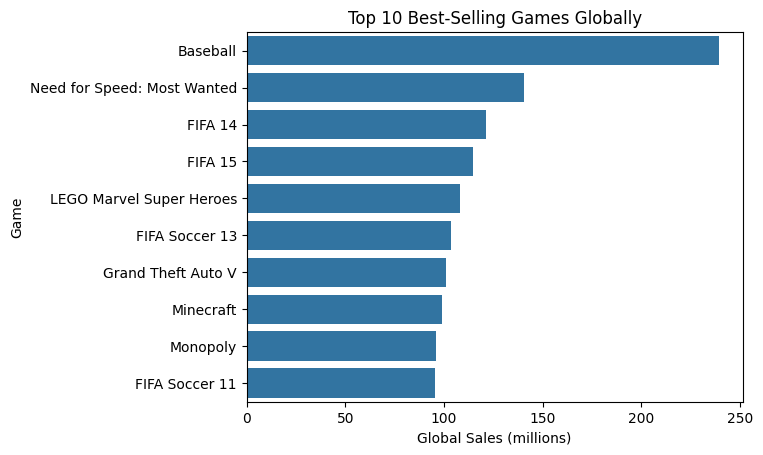

In [22]:
sns.barplot(x=top_games.values, y=top_games.index)
plt.title('Top 10 Best-Selling Games Globally')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Game')
plt.show()


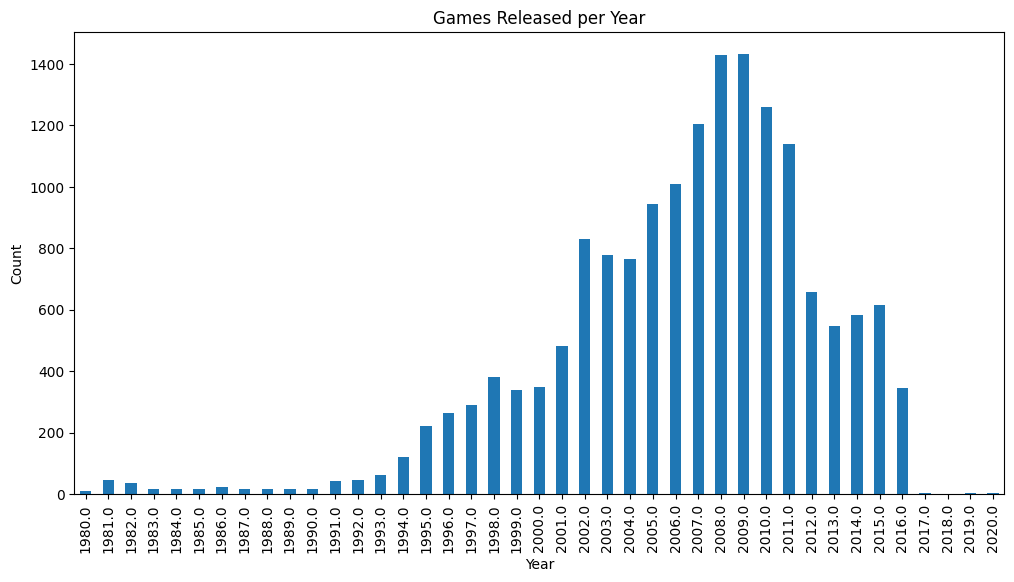

In [23]:
data['Year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title('Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


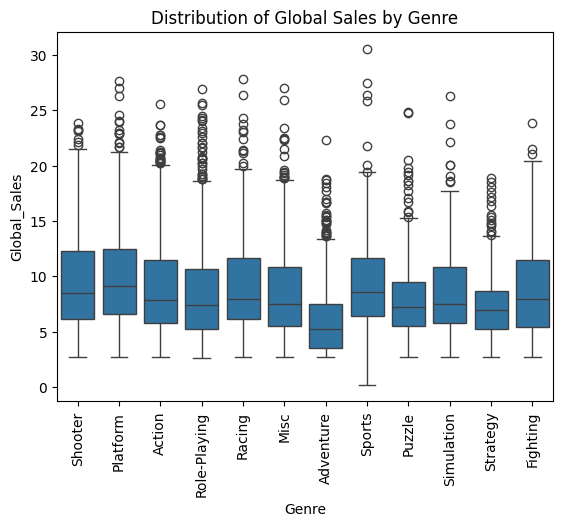

In [24]:
sns.boxplot(x='Genre', y='Global_Sales', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Global Sales by Genre')
plt.show()


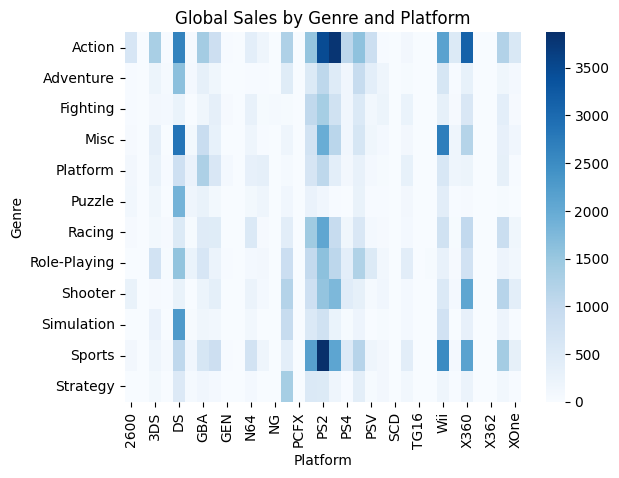

In [25]:
pivot = data.pivot_table(values='Global_Sales', index='Genre', columns='Platform', aggfunc='sum', fill_value=0)
sns.heatmap(pivot, cmap='Blues')
plt.title('Global Sales by Genre and Platform')
plt.show()


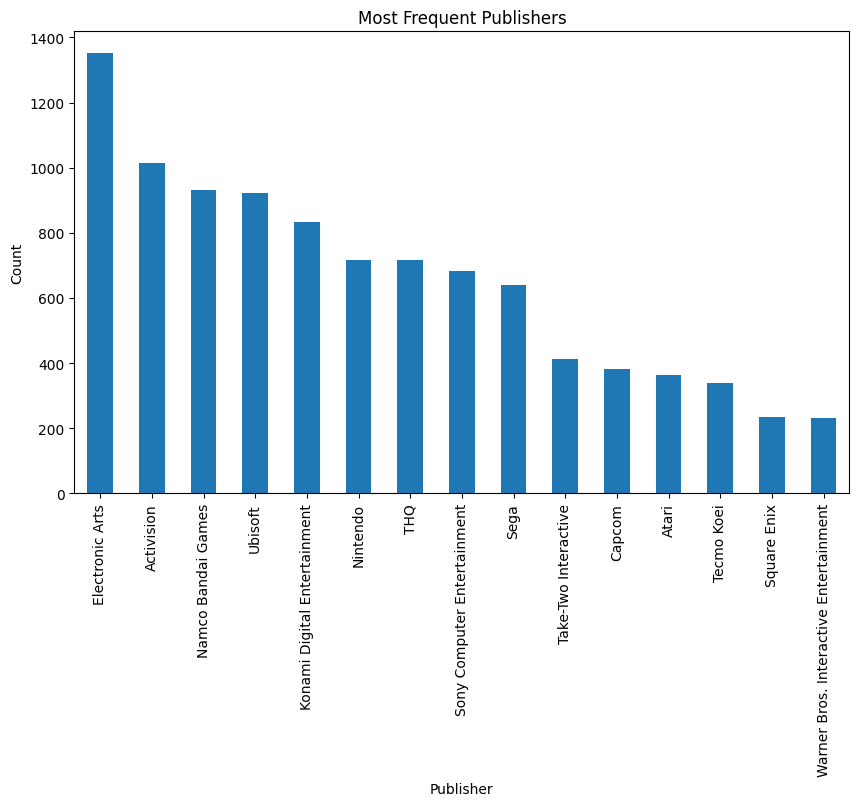

In [26]:
data['Publisher'].value_counts().head(15).plot(kind='bar', figsize=(10,6))
plt.title('Most Frequent Publishers')
plt.xlabel('Publisher')
plt.ylabel('Count')
plt.show()


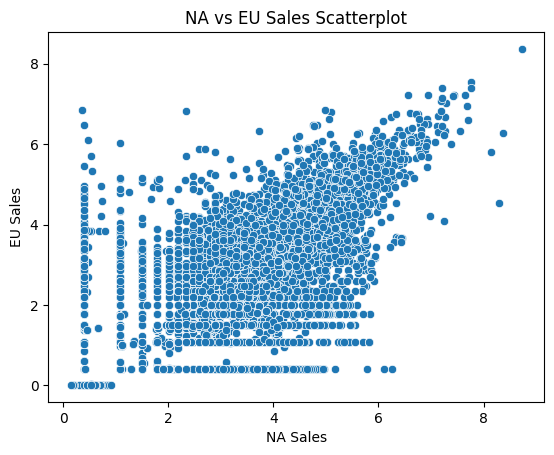

In [27]:
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=data)
plt.title('NA vs EU Sales Scatterplot')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.show()


In [28]:
data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].mean()


,0
NA_Sales,2.752314
EU_Sales,1.996875
JP_Sales,2.499677
Other_Sales,1.151829
Global_Sales,8.457873


In [29]:
data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].median()


,0
NA_Sales,2.697415
EU_Sales,1.714664
JP_Sales,2.480356
Other_Sales,0.491870
Global_Sales,7.536614


In [30]:
data[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()


,0
NA_Sales,45831.525845
EU_Sales,33251.970702
JP_Sales,41624.625635
Other_Sales,19180.256828
Global_Sales,140840.506948
